In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'


# Mindsight case
 
"estudo quantitativo que possibilite tomar melhores decisões no momento de contratar e/ou fazer movimentações internas." 

#### Dados:
- testes psicométricos de funcionários
- avaliação de desempenho semestral
- área de cada funcionário

#### Ideias:
1. Modelo preditivo que estime a performance da pessoa baseada nos testes e na área.

##### Com o modelo poderíamos:
- Prever a performance de um novo candidato com base no seu teste psicométrico. (contratações)
- Estimar a performance de funcionários existentes para cada área usando seus testes psicométricos e checar se o funcionário está na área que dá a melhor performance, segundo o teste. (movimentações internas)


#### Ideias
2. Criação de perfis com base em agrupamentos dos testes psicométricos com informação sobre performance em cada área.

##### Com os perfis poderíamos:
- Classificar candidados em um perfil psicométrico e avaliar como é a performance (por área ou total) de pessoas previamente classificadas nesse perfil (contratação).
- Checar se funcionários com baixa performance estão em áreas cujo seu perfil tem bom potencial de performance. 

# Preparação e entendimento dos dados

### Dados de Área

In [81]:
df_area = pd.read_csv('raw_data/area_raw_data.csv')
df_area.info() #texto, sem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4394 entries, 0 to 4393
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CPF     4394 non-null   object
 1   Área    4394 non-null   object
dtypes: object(2)
memory usage: 68.8+ KB


(array([1590.,    0.,  919.,    0.,    0., 1713.,    0.,   92.,    0.,
          80.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

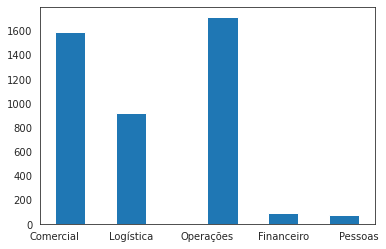

In [82]:
plt.hist(df_area['Área'])

### Dados de performance

In [83]:
df_per = pd.read_csv('raw_data/performance_raw_data.csv')
df_per['AveragePerformance'] = df_per.mean(axis=1) #Average Performance column added
df_per['MaxPerformance'] = df_per.max(axis=1) #Average Performance column added
df_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CPF                  2382 non-null   object 
 1   Performance 1º/2019  1547 non-null   float64
 2   Performance 2º/2018  1577 non-null   float64
 3   Performance 1º/2018  988 non-null    float64
 4   Performance 2º 2017  353 non-null    float64
 5   AveragePerformance   1617 non-null   float64
 6   MaxPerformance       1617 non-null   float64
dtypes: float64(6), object(1)
memory usage: 130.4+ KB


In [84]:
df_per = df_per.drop(['Performance 1º/2019','Performance 2º/2018','Performance 1º/2018','Performance 2º 2017'],axis=1)
df_per.describe()

,AveragePerformance,MaxPerformance
count,1617.000000,1617.000000
mean,1.977170,2.395795
std,0.453591,0.592178
min,1.000000,1.000000
25%,1.666667,2.000000
50%,2.000000,2.000000
75%,2.333333,3.000000
max,3.000000,3.000000


(array([ 90.,  20.,  17., 168.,   0., 304.,   0., 493.,   0.,  33., 217.,
        188.,  12.,   1.,  74.]),
 array([1.        , 1.13333333, 1.26666667, 1.4       , 1.53333333,
        1.66666667, 1.8       , 1.93333333, 2.06666667, 2.2       ,
        2.33333333, 2.46666667, 2.6       , 2.73333333, 2.86666667,
        3.        ]),
 <BarContainer object of 15 artists>)

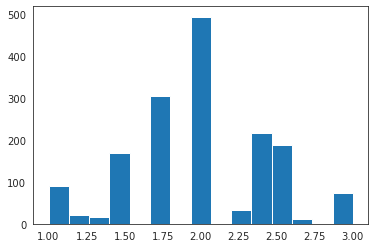

In [85]:
plt.hist(df_per['AveragePerformance'],align='mid',bins=15)

### Dados teste psicométrico

In [86]:
df_psy= pd.read_csv('raw_data/psyctest_raw_data.csv')
print(df_psy.columns)

Index(['Nome', 'Sobrenome', 'E-mail', 'CPF', 'Match', 'Potencial Bruto',
       'Raciocínio', 'Social', 'Motivacional', 'Cultura pontuação',
       'Cultura classificação', 'atributo-Capacidade analítica',
       'atributo-Pensamento conceitual', 'atributo-Reflexão',
       'atributo-Pensamento criativo', 'atributo-Planejamento e organização',
       'atributo-Comunicação', 'atributo-Consideração pelos outros',
       'atributo-Influência', 'atributo-Sociabilidade', 'atributo-Facilitação',
       'atributo-Flexibilidade', 'atributo-Estabilidade emocional',
       'atributo-Ambição', 'atributo-Iniciativa', 'atributo-Assertividade',
       'atributo-Tomada de riscos', 'perfil-Capacidade analítica',
       'perfil-Pensamento conceitual', 'perfil-Reflexão',
       'perfil-Pensamento criativo', 'perfil-Planejamento e organização',
       'perfil-Comunicação', 'perfil-Consideração pelos outros',
       'perfil-Influência', 'perfil-Sociabilidade', 'perfil-Facilitação',
       'perfil-Flexibil

In [87]:
not_useful_for_now_labels = ["Nome",'Sobrenome','E-mail','Match',"URL Raciocínio","URL Cultura","URL Social",
"URL Motivacional","URL Perfil",'Início - Perfil','Fim - Perfil','Início - Motivacional','Fim - Motivacional',
'Início - Social','Fim - Social', "Início - Raciocínio",'Fim - Raciocínio','Início - Cultura','Fim - Cultura']
df_psy = df_psy.drop(not_useful_for_now_labels, axis=1)
df_psy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CPF                                  4281 non-null   object 
 1   Potencial Bruto                      928 non-null    float64
 2   Raciocínio                           3234 non-null   float64
 3   Social                               981 non-null    float64
 4   Motivacional                         956 non-null    float64
 5   Cultura pontuação                    3311 non-null   float64
 6   Cultura classificação                3311 non-null   object 
 7   atributo-Capacidade analítica        921 non-null    float64
 8   atributo-Pensamento conceitual       921 non-null    float64
 9   atributo-Reflexão                    921 non-null    float64
 10  atributo-Pensamento criativo         921 non-null    float64
 11  atributo-Planejamento e organi

- Cultura classificação(str): feito a partir de Cultura pontuação -> redundante

In [88]:
df_psy = df_psy.drop(['Cultura classificação'],axis=1)

### Juntando os dados por CPF:

In [89]:
print('Área:',len(df_area))
print('Testes psi:',len(df_psy))
print('Performance:',len(df_per))

Área: 4394
Testes psi: 4281
Performance: 2382


In [90]:
df_area_psy = df_area.merge(df_psy,on="CPF")
df_area_psy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4281 entries, 0 to 4280
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CPF                                  4281 non-null   object 
 1   Área                                 4281 non-null   object 
 2   Potencial Bruto                      928 non-null    float64
 3   Raciocínio                           3234 non-null   float64
 4   Social                               981 non-null    float64
 5   Motivacional                         956 non-null    float64
 6   Cultura pontuação                    3311 non-null   float64
 7   atributo-Capacidade analítica        921 non-null    float64
 8   atributo-Pensamento conceitual       921 non-null    float64
 9   atributo-Reflexão                    921 non-null    float64
 10  atributo-Pensamento criativo         921 non-null    float64
 11  atributo-Planejamento e organi

Criei dois arquivos de dados: test_data_without_performance.csv, training_data_with_performance.csv

In [142]:
df_noPer = df_area_psy[df_area_psy.CPF.isin(df_per.CPF) == False] #data with no CPF on performance dataset
df = df_per.merge(df_area_psy,on='CPF') #data with CPF on performance dataset
print('No performance:',len(pd.concat([df_noPer,df[df['AveragePerformance'].isna()]])))
pd.concat([df_noPer,df[df['AveragePerformance'].isna()]]).to_csv("presentation_data/test_data_without_performance.csv",index=False)
df = df[df['AveragePerformance'].isna() == False]
df.to_csv("presentation_data/training_data_with_performance.csv",index=False)
df = df.drop(['CPF'],axis =1) #df -> É o training_data, só os dados com performance
print('df with performance:',len(df)) #save data data with no CPF on performance dataset or with CPF but no performance value


No performance: 2755
df with performance: 1526


In [92]:
df.describe()

,AveragePerformance,MaxPerformance,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,...,perfil-Consideração pelos outros,perfil-Influência,perfil-Sociabilidade,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos
count,1526.000000,1526.000000,351.000000,1162.000000,368.000000,363.000000,1188.000000,345.000000,345.000000,345.000000,...,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,1.974498,2.392529,51.497123,50.938107,50.265245,54.092424,45.359057,56.539014,50.145304,44.830696,...,48.800212,52.864271,54.009310,49.127294,47.124430,53.837215,51.524218,50.998196,42.068674,39.951989
std,0.443040,0.586110,11.994322,19.602097,18.062419,18.470780,17.117602,22.650306,21.210591,20.369404,...,17.476189,19.866740,21.528342,20.600768,16.051692,21.201156,19.062317,15.662966,15.511952,15.518003
min,1.000000,1.000000,12.250000,7.980000,5.670000,5.550000,0.350000,7.240000,5.860000,3.120000,...,7.440000,6.140000,6.140000,6.140000,7.440000,6.140000,8.740000,8.740000,7.440000,4.840000
25%,1.666667,2.000000,43.675000,37.330000,37.650000,41.170000,32.537500,39.260000,33.650000,29.210000,...,37.410000,37.410000,37.410000,32.860000,32.860000,37.410000,37.410000,41.950000,32.860000,28.320000
50%,2.000000,2.000000,51.600000,52.660000,50.820000,51.560000,43.640000,59.240000,52.030000,45.650000,...,46.500000,55.590000,55.590000,46.500000,46.500000,55.590000,51.050000,51.050000,41.950000,41.950000
75%,2.333333,3.000000,60.110000,65.390000,63.990000,67.140000,57.620000,76.060000,66.380000,59.200000,...,60.140000,69.230000,69.230000,64.680000,60.140000,69.230000,64.680000,60.140000,51.050000,51.050000
max,3.000000,3.000000,84.540000,93.320000,93.860000,95.340000,100.000000,100.000000,94.330000,89.710000,...,91.860000,93.160000,91.860000,93.160000,90.560000,93.160000,91.860000,91.860000,82.860000,82.860000


#### Categorias de análise:
- Habilidades: Raciocínio (1200), Social (350), Motivacional (~350)
- Potencial Bruto (~350): é uma média ponderada de 40%Raciocínio, 35%Social e 25%Motivacional -> Sintetiza as 3 habilidades
- Cultura pontuação (~1200)
- Perfil (~350): autoavaliação em 16 características
- Atributo (~350): tendências do comportamento em 16 atributos -> A partir das 3 habilidades + autoavaliaçao

#### Possibilidades de uso dos dados:
- Potencial Bruto + Cultura + Atributo
- 3Habilidades + Cultura + Perfil

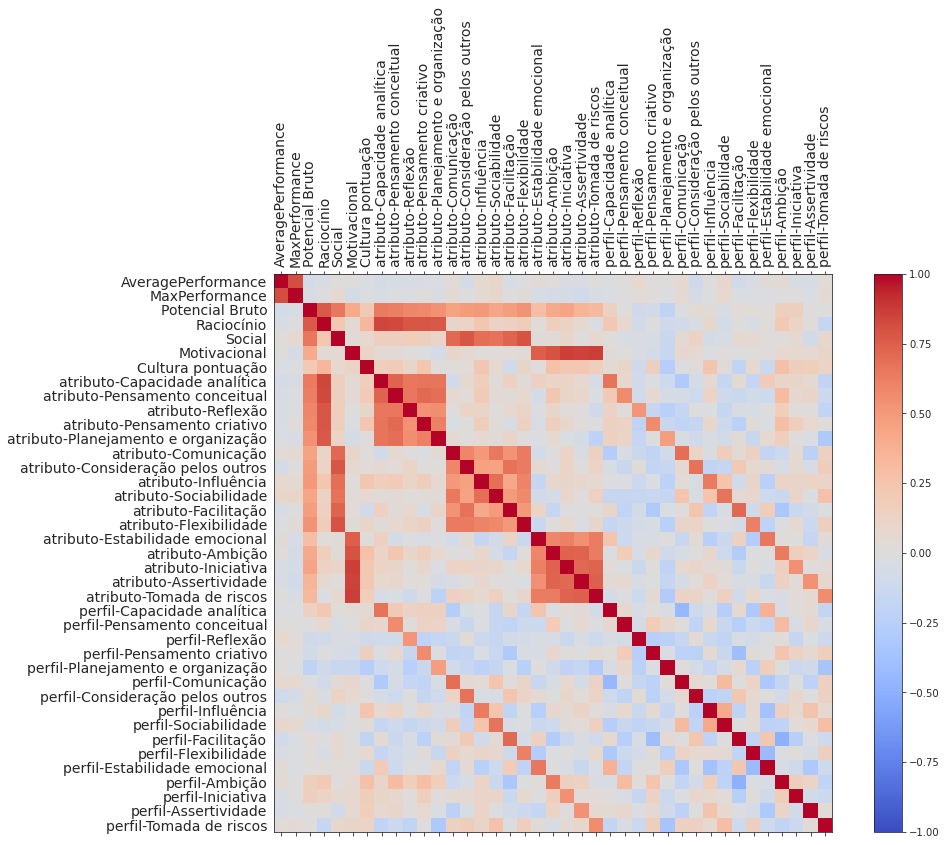

In [93]:
f = plt.figure(figsize=(15, 10)) #Plot correlação monotônica entre variáveis
plt.matshow(df.corr(method='spearman'), fignum=f.number,cmap=plt.cm.coolwarm,vmin = -1,vmax=1)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

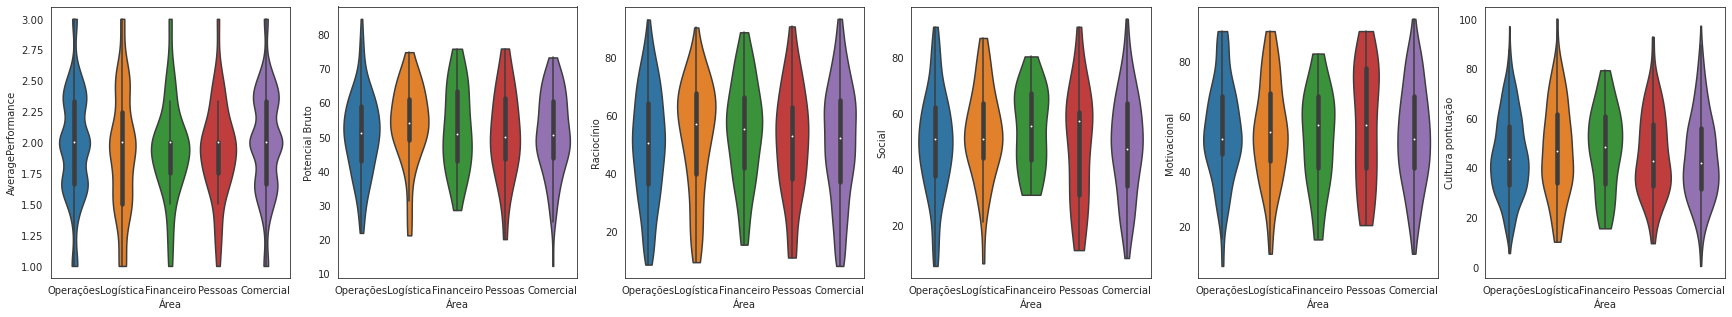

In [94]:
#Check the distribution of some values by Área
f, axes = plt.subplots(1,6,figsize=(30,5))
i=0
for feature in ["AveragePerformance",'Potencial Bruto',
       'Raciocínio', 'Social', 'Motivacional', 'Cultura pontuação']:
    sns.violinplot(data=df, x = "Área", y = feature,cut=0,ax=axes[i])
    i+=1

In [95]:
atributos = ['atributo-Capacidade analítica',
       'atributo-Pensamento conceitual', 'atributo-Reflexão',
       'atributo-Pensamento criativo', 'atributo-Planejamento e organização',
       'atributo-Comunicação', 'atributo-Consideração pelos outros',
       'atributo-Influência', 'atributo-Sociabilidade', 'atributo-Facilitação',
       'atributo-Flexibilidade', 'atributo-Estabilidade emocional',
       'atributo-Ambição', 'atributo-Iniciativa', 'atributo-Assertividade',
       'atributo-Tomada de riscos']
perfil = ['perfil-Capacidade analítica',
       'perfil-Pensamento conceitual', 'perfil-Reflexão',
       'perfil-Pensamento criativo', 'perfil-Planejamento e organização',
       'perfil-Comunicação', 'perfil-Consideração pelos outros',
       'perfil-Influência', 'perfil-Sociabilidade', 'perfil-Facilitação',
       'perfil-Flexibilidade', 'perfil-Estabilidade emocional',
       'perfil-Ambição', 'perfil-Iniciativa', 'perfil-Assertividade',
       'perfil-Tomada de riscos']

# Modelo regressão

regression_fit():
- Grid model (CrossValidation + testar diferentes hyperparâmetros do modelo)
    - pipeline:
        - Resolver NaN: drop OU KNNImputer(completa dados usando média dos K-nearest neighbors)
        - StandardScaler - transforma todas as features para média 0 e var=1
        - Regressor models: RandomForest(conjunto de árvores de decisão), LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

grid = grid.fit(X_train, y_train)

prediction = grid.predict(X_test)

metric = R2_score(y_test,prediction)

(quão longe os valores reais estão da média da predição: 1=predições perfeitas)


In [96]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as imbpipeline


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [97]:
def grid_model(model_name,inputer = 'drop'):

    if model_name == 'RandomForestReg':
        model = RandomForestRegressor(random_state=0)
        #hypeparameters combination of random forest model to test in the grid search
        hyper_params = {
        'model__n_estimators': [3,5,10], 
        'model__max_depth': [2,3,5],
        #'model__min_samples_split':[2,6]
        }

    elif model_name == 'LinearReg':
        model = LinearRegression()
        hyper_params = {
        'model__n_jobs': [1,3],}
    
    elif model_name == 'lasso':
        model = Lasso(random_state=0, max_iter=50000)
        hyper_params = {
        'model__alpha': np.logspace(-4, -0.5, 5),   
        }

    elif model_name == 'ridge':
        model = Ridge()
        hyper_params = {
        'model__alpha': [0.1,1.0],     
        }

    #defining the pipeline steps for each model
    if inputer == 'constant':
        pipeline = imbpipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,strategy='constant',add_indicator=True)), #transform: solve missing values 
        ('scaler', StandardScaler()),                                     #transform: standart normalization of values (mean = 0, std = 1)
        ('model',model)                             #regression model
                            ])
    
    elif inputer == 'mean':
        pipeline = imbpipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,strategy='mean',add_indicator=True)), 
        ('scaler', StandardScaler()),                                    
        ('model',model)  
                            ])
    
    elif inputer == 'drop':
        pipeline = imbpipeline(steps=[
        ('scaler', StandardScaler()), 
        ('model',model)  
                            ])

    elif inputer == 'KNN':
        hyper_params['imputer__n_neighbors']=[1,3,5]
        pipeline = imbpipeline(steps=[
        ('imputer', KNNImputer(missing_values=np.nan,add_indicator=True)),
        ('scaler', StandardScaler()),                                    
        ('model',model)  
                            ])


    # grid search definition
    grid = GridSearchCV(
        pipeline,
        param_grid = hyper_params,
        scoring = 'r2',   #balance between precision (true positives compared to all the positives) and recall(trues found compared to the total trues)
        cv = 5,
        n_jobs = 1)

    return grid

def select_features(df,atributos,perfil,performance_metric,option='all'):
    if option == 'all':
        if performance_metric == 'AveragePerformance':
            return df.drop(['MaxPerformance'], axis = 1)
        elif performance_metric == 'MaxPerformance':
            return df.drop(['AveragePerformance'], axis = 1)
    elif option == 'Pot_Cult_Atr':
        list_features = [performance_metric,'Potencial Bruto','Cultura pontuação']+ atributos
        return df[list_features]
    elif option == 'Hab_Cult_Per':
        list_features = [performance_metric,'Raciocínio', 'Social', 'Motivacional','Cultura pontuação']+ perfil
        return df[list_features]
    elif option == 'Hab_Cult':
        list_features = [performance_metric,'Raciocínio', 'Social', 'Motivacional','Cultura pontuação']
        return df[list_features]
    elif option == 'just_one_per':
        list_features = [performance_metric,'perfil-Assertividade']
        return df[list_features]

def regression_fit(df,performance_metric):
    results = {'Model':[],'PerformanceMetric':[],'Inputer':[],'MAE':[],'ExplainedVar':[],'R2_score':[],'ListFeatures':[]}
    for model_name in ['LinearReg','RandomForestReg']: #'lasso','ridge',
        print(model_name)
        for inputer in ['drop','KNN']: # 'constant','mean'
            grid = grid_model(model_name,inputer)

            for list_features in ['just_one_per','Pot_Cult_Atr','Hab_Cult_Per','Hab_Cult','all']:
                df_training = select_features(df,atributos,perfil,performance_metric,option=list_features)
                
                if inputer == 'drop':
                    df_training = df_training.dropna(axis=0,how='any')

                y = df_training[performance_metric]                         #target prediction
                X = df_training.drop([performance_metric], axis = 1)


                X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

                grid = grid.fit(X_train, y_train)
                prediction = grid.predict(X_test)
                results['Model'].append(model_name)
                results['PerformanceMetric'].append(performance_metric)
                results['Inputer'].append(inputer)
                results['R2_score'].append(round(r2_score(y_test, prediction),4))
                results['MAE'].append(round(mean_absolute_error(y_test, prediction),4))
                results['ExplainedVar'].append(round(explained_variance_score(y_test, prediction),4))
                results['ListFeatures'].append(list_features)
    
    results = pd.DataFrame(results)
    #sns.catplot(data=results, x="Model", y="MAE",col="Inputer",hue='ListFeatures',s=10)
    sns.catplot(data=results, x="Model", y="R2_score",col="Inputer",hue='ListFeatures',s=10)
    print('Performance metric:',performance_metric)
    return results

In [98]:
df = pd.read_csv("presentation_data/training_data_with_performance.csv").drop(['CPF'],axis =1)
print(df['Área'].unique())
df['Área'] = df['Área'].map({'Operações':0, 'Logística':1, 'Financeiro':2, 'Pessoas':3, 'Comercial':4})

['Operações' 'Logística' 'Financeiro' 'Pessoas' 'Comercial']


LinearReg
RandomForestReg
Performance metric: AveragePerformance


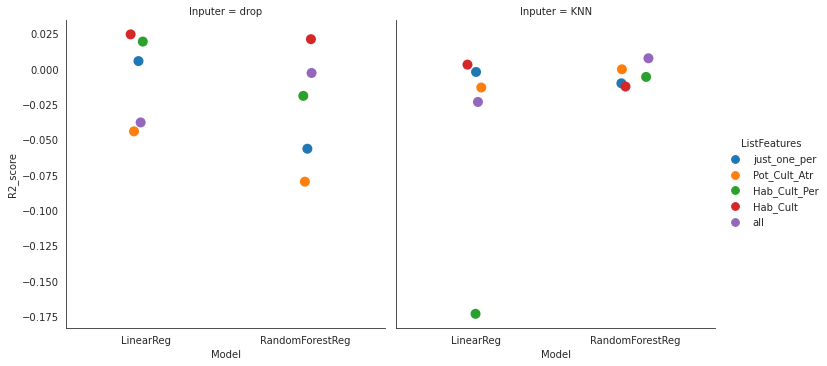

In [99]:
results_avg = regression_fit(df,'AveragePerformance')
#- Potencial Bruto + Cultura + Atributo
#- 3Habilidades + Cultura + Perfil

In [100]:
#results_max = regression_fit(df,'MaxPerformance')  

Idealmente, com um bom modelo poderíamos:

- Prever a performance dos ~2000 funcionários no "test_data_without_performance" e, posteriormente, checar a estimativa com a avaliação real. (teste e melhora do modelo)
- Usar o teste psiscométrico de um funcionário com performance baixa na sua área e estimar qual seria a sua performance em outras áreas. (avaliar movimentações internas)
- Usar o modelo para prever a performance de candidatos com base no seus testes psicométricos. (contratação)

# Clusterização

In [101]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

- Spectral Clustering: pontos são nós de um grafo e são mapeados para um espaço dimensional menor onde se distanciam e podem formar clusters. Agrupa dados conectados mas não necessariamente compactos ou em um espaço convexo.

- só usei dados completos (exclui casos que alguma das features estava vazia) -> reduziu bastante a quantidade de dados (~350)

In [118]:
def SpecCluster(X,n_cluster_list=[2,10,15,20,30,50]):
    for n_cluster in n_cluster_list:
        spec_c = SpectralClustering(n_clusters=n_cluster,eigen_solver='arpack',n_init=10,
                        assign_labels='kmeans',random_state=0).fit(X)
        score = silhouette_score(X, spec_c.labels_, metric='euclidean')

        unique, counts = np.unique(spec_c.labels_, return_counts=True)

        print('Nclu: {0}. Silhou: {1} - Count: {2}'.format(n_cluster,round(score,2),counts))

    return

def DBSCANCluster(X,min_samples_list = [50,100,200],eps_list = [1,1.005,1.01,1.02,1.03,1.04,1.05,1.09,1.1]):
    for min_samples in min_samples_list:
        for eps in eps_list:
            db = DBSCAN(min_samples = min_samples,eps=eps).fit(X)
            try:
                silhou = silhouette_score(X, db.labels_, metric='euclidean')
                calins = calinski_harabasz_score(X, db.labels_)
                if len([x for x in set(db.labels_) if x >=0]) > 2 and silhou > 0:
                    print('Params {0}-{1} has {2} Nclus and scores silhou = {3} and calins = {4}'.format(min_samples,eps,len([x for x in set(db.labels_) if x >=0]),round(silhou,2),round(calins,0)))
            except:
                print('Params {0}-{1} has {2} Nclus'.format(min_samples,eps,len([x for x in set(db.labels_) if x >=0])))

    return

def clusters_metrics(X):
    all = {'Cluster':[],'Área':[],'AvgPerformanceDist':[]}
    for label in sorted(X['labels'].unique()):
        X_this_label = X[X['labels']==label]
        for area in X_this_label['Área'].unique():
            X_this_label_each_area = X_this_label[X_this_label['Área'] == area]
            all['Cluster'].extend([str(label)]*len(X_this_label_each_area['AveragePerformance']))
            all['Área'].extend([area]*len(X_this_label_each_area['AveragePerformance']))
            all['AvgPerformanceDist'].extend(X_this_label_each_area['AveragePerformance'])


    df_results = pd.DataFrame(all)
    sns.boxplot(y=df_results['AvgPerformanceDist'],x=df_results['Cluster'],hue=df_results['Área'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    return 

def nested_cluster(X,label,n_cluster_list=[2,3,4,5,6,7,8,9,10], CHOICE = 0):
    X_nested = X[X['labels'] == label]
    X_nested[:] = StandardScaler().fit_transform(X_nested)
    if CHOICE == 0:
        SpecCluster(X_nested,n_cluster_list)
        return
    else:
        spec_c_choice = SpectralClustering(n_clusters=CHOICE,eigen_solver='arpack',n_init=10,
                        assign_labels='kmeans',random_state=0).fit(X_nested)
        X_nested['labels'] = spec_c_choice.labels_
        for cluster_label in sorted(X_nested['labels'].unique()):
            print(len(X_nested[X_nested['labels'] == cluster_label]),cluster_label)
        return X_nested

In [138]:
%%capture
df = pd.read_csv("presentation_data/training_data_with_performance.csv").drop(['CPF'],axis =1)


X = df[['Raciocínio','Social','Motivacional','Cultura pontuação','Área','AveragePerformance']].dropna(axis=0,how='any')

#X = df[['Potencial Bruto','Cultura pontuação','Área','AveragePerformance'] + atributos].dropna(axis=0,how='any')
#X = df[['Raciocínio','Social','Motivacional','Cultura pontuação','Área','AveragePerformance'] + perfil].dropna(axis=0,how='any')

(array([131.,   0.,  25.,   0.,   0.,  19.,   0.,  51.,   0., 114.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

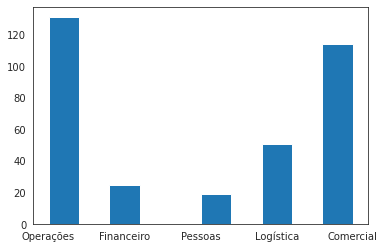

In [139]:
plt.hist(X['Área'])

In [ ]:
%%capture
y =  X[['Área','AveragePerformance']]
X = X.drop(['Área','AveragePerformance'],axis=1)
#X[:] = KNNImputer(missing_values=np.nan,n_neighbors = 1,add_indicator=False).fit_transform(X)
scaler = StandardScaler().fit(X)
X[:] = scaler.transform(X)

Metrics: 
- Silhouette: distância de separação entre os clusters [-1,1]

Próximo de +1 -> pontos estão classificados longe de seus clusters vizinhos

Próximo de 0 -> pontos estão na fronteira (ou próximos) entre seu cluster e o vizinho

Negativos -> pontos podem estar no cluster errado

In [104]:
#DBSCANCluster(X,min_samples_list = [3,5,10],eps_list = [0.1,0.5,1,1.5])

Entender agrupamento dos dados em relação à área e performance:

- Potencial Bruto + Cultura + Atributo: 

Nclu: 2. Silhou: 0.15 - Count: [188 155]

Nclu: 3. Silhou: 0.12 - Count: [150  59 134]

Nclu: 4. Silhou: 0.12 - Count: [198  63  24  58]

Nclu: 5. Silhou: 0.1 - Count: [144  24  57  36  82]

- Habilidades + Cultura + Perfil:

Nclu: 2. Silhou: 0.06 - Count: [254  82]

Nclu: 3. Silhou: -0.0 - Count: [307   5  24]

Nclu: 4. Silhou: -0.0 - Count: [289   5  24  18]

Nclu: 5. Silhou: -0.04 - Count: [281   9   5  24  17]

- Habilidades + Cultura:

In [125]:
SpecCluster(X,n_cluster_list=[2,3,4,5,6,7,8,9,10,15])

Nclu: 2. Silhou: 0.22 - Count: [237 103]
Nclu: 3. Silhou: 0.18 - Count: [190  99  51]
Nclu: 4. Silhou: 0.19 - Count: [ 69  51  92 128]
Nclu: 5. Silhou: 0.19 - Count: [ 59  38 122  60  61]
Nclu: 6. Silhou: 0.18 - Count: [75 21 23 85 66 70]
Nclu: 7. Silhou: 0.16 - Count: [ 14  77 106  30  78  15  20]
Nclu: 8. Silhou: 0.14 - Count: [129   3  15  29  13  60  69  22]
Nclu: 9. Silhou: 0.09 - Count: [ 22  20 186  14  26  50   7   3  12]
Nclu: 10. Silhou: 0.13 - Count: [ 15  49  14  93  27 105   4  12   3  18]
Nclu: 15. Silhou: 0.13 - Count: [ 21  19  13  36   3  37   5   8  11   4  20  34 106  19   4]


In [127]:
#Choose the number of clusters to use (based on score + distribution of values)
NUMBER_OF_CLUSTERS = 5
spec_c_choice = SpectralClustering(n_clusters=NUMBER_OF_CLUSTERS,eigen_solver='arpack',n_init=10,
                        assign_labels='kmeans',random_state=0).fit(X)
X[:] = scaler.inverse_transform(X)
X['labels'] = spec_c_choice.labels_
for cluster_label in sorted(X['labels'].unique()):
    print(cluster_label,len(X[X['labels'] == cluster_label]))

0 59
1 38
2 122
3 60
4 61


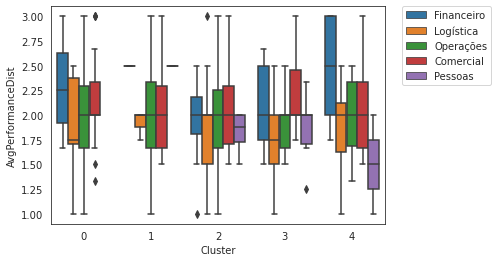

In [128]:
clusters_metrics(X.join(y))
#lembrar 
#financeiro e pessoas (~20)
#logística (50),
#comercial e operações (>100)

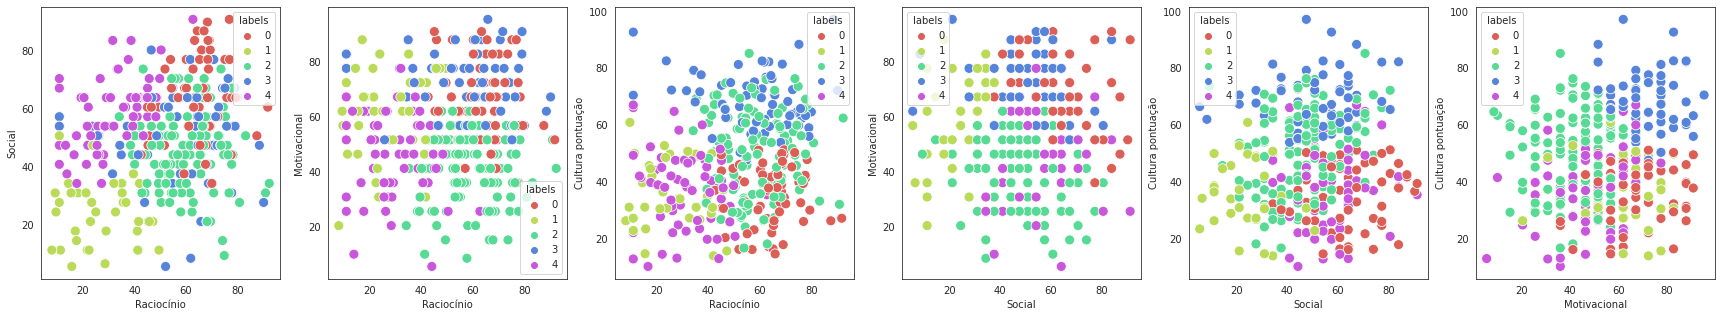

In [137]:
import itertools
f, axes = plt.subplots(1,6,figsize=(30,5))
i=0
for feature_1,feature_2 in list(itertools.combinations(['Raciocínio','Social','Motivacional','Cultura pontuação'],2)):
    sns.scatterplot(data=X, x=feature_1, y=feature_2, hue=X['labels'], s=100,palette=sns.color_palette("hls", len(X['labels'].unique())),ax=axes[i])       
    plt.xlabel(feature_1),plt.ylabel(feature_2)
    i+=1